#                                       **CIFAR-10: Image Classification**

#   Step 1: Data Preprocessing & Loading 
##  Visualization of Images and Labels / Inserting Grayscale Conversion / Augmentation 


%pip install matplotlib
%pip install numpy
%pip install tensorflow
%pip install tensorflow-gpu

In [75]:
# Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [76]:
# Load the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [77]:
#x_train = x_train.astype('float32') / 255.0
#x_test = x_test.astype('float32') / 255.0

In [78]:
# One-hot encode the labels
#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

In [79]:
# Check data dimensions
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


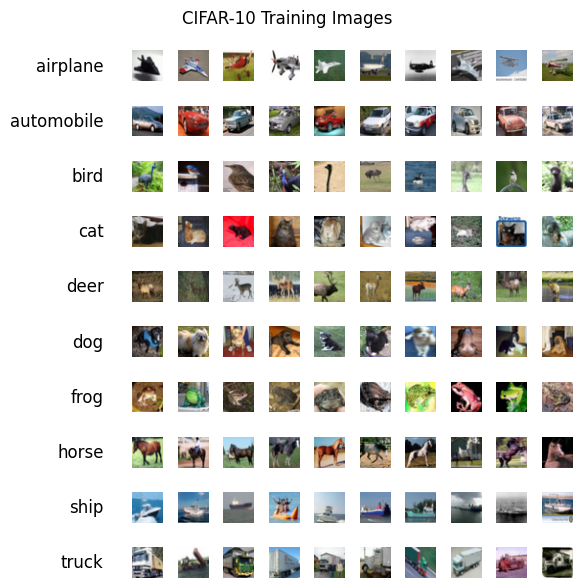

In [80]:
# Define a list with all the class labels for CIFAR-10
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Function to visualize color images from CIFAR-10 dataset with correct labeling
def visualize_color_images_with_labels(images, labels, classes, images_per_class=10, title="CIFAR-10 Images"):
    num_classes = len(classes)
    total_images = num_classes * images_per_class

    plt.figure(figsize=(6, 6))
    image_count = 0

    # Loop through class labels to pick images_per_class images per class
    for class_index, class_name in enumerate(classes):
        class_images = images[labels.flatten() == class_index][:images_per_class]

        # Loop through the images, arranging them dynamically
        for img in class_images:
            plt.subplot(num_classes, images_per_class, image_count + 1)
            plt.imshow(img)
            plt.axis('off')
            
            # Add class label to the left side of each row
            if image_count % images_per_class == 0:
                plt.text(-30, 32 // 2, class_name, rotation=0, size='large', va='center', ha='right')
            
            image_count += 1
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Visualize color images from the CIFAR-10 training set
visualize_color_images_with_labels(x_train, y_train, classes, images_per_class=10, title="CIFAR-10 Training Images")


In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Initialize ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,        # Rotate images up to 20 degrees
    width_shift_range=0.2,    # Shift images horizontally by 20%
    height_shift_range=0.2,   # Shift images vertically by 20%
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Zoom in/out on images
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in pixels with nearest values
)

# Convert the images to grayscale using TensorFlow's `rgb_to_grayscale`
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)

# Check the shape of grayscale images
print(f"x_train_gray shape: {x_train_gray.shape}")  # (50000, 32, 32, 1)
print(f"x_test_gray shape: {x_test_gray.shape}")    # (10000, 32, 32, 1)

# Fit the generator to the training data
datagen.fit(x_train_gray)

# Example of how to use the augmented generator in model training
# model.fit(datagen.flow(x_train_gray, y_train, batch_size=32), epochs=10)


x_train_gray shape: (50000, 32, 32, 1)
x_test_gray shape: (10000, 32, 32, 1)


In [82]:
# Normalize pixel values to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Verify data shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [83]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10, 10)
(10000, 10, 10)


In [84]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model/data parameters
num_classes = 10
input_shape = (32, 32, 3)  # CIFAR-10 input shape, RGB format
dropout_rate = 0.2
epochs = 10

# One-hot encode labels
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Normalize the images
x_train_normalized = x_train.astype("float32") / 255.0
x_test_normalized = x_test.astype("float32") / 255.0

# Perform the train-validation split
x_train_normalized_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_normalized, y_train_encoded, test_size=0.2, random_state=42)

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define Data Augmentation using ImageDataGenerator
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Define the model
model = Sequential([
    layers.Input(shape=input_shape),
    data_augmentation,  # Data augmentation layer
    layers.Conv2D(32, (3, 3), padding="same", activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
    layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(64, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 32, 32, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 4096)            

In [90]:
# Set up data augmentation for the training dataset using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [91]:
# Train the model (No ImageDataGenerator needed)

history = model.fit(
    x_train_normalized_split, y_train_split,
    validation_data=(x_val_split, y_val_split),
    epochs=epochs,
    callbacks=[early_stopping],
    batch_size=32
)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 10, 10, 10) and (32, 10) are incompatible


# Code Dump can be usefull.

In [40]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with normalized data
history = model.fit(x_train_normalized, y_train, validation_data=(x_val_split, y_val_split), epochs = epochs, callbacks = [early_stopping])


Epoch 1/10


ValueError: in user code:

    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training.py", line 894, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training.py", line 987, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\compile_utils.py", line 501, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\metrics\base_metric.py", line 646, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\metrics\metrics.py", line 3295, in categorical_accuracy
        return metrics_utils.sparse_categorical_matches(
    File "c:\Users\diego\anaconda3\envs\tensorflow_env\lib\site-packages\keras\utils\metrics_utils.py", line 885, in sparse_categorical_matches
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for '{{node Squeeze}} = Squeeze[T=DT_INT64, squeeze_dims=[-1]](ArgMax)' with input shapes: [?,10].


In [ ]:
# Initialize ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Compile the model with the correct loss function for integer labels
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Perform the train-validation split
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Train the model
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=64),
    validation_data=(x_val_split, y_val_split),
    epochs=10
)

# Check the accuracy and loss values after the first epoch
initial_train_acc = history.history['accuracy'][0]
initial_val_acc = history.history['val_accuracy'][0]

assert initial_train_acc > 0, "Model training didn't start properly!"
assert initial_val_acc > 0, "Validation accuracy not improving!"


In [ ]:
# Function to collect augmented data
def collect_augmented_data(datagen, x_data, y_data, batch_size=32):
    iterator = datagen.flow(x_data, y_data, batch_size=batch_size)
    augmented_images = []
    augmented_labels = []
    
    total_samples = len(x_data)
    batches_to_process = int(np.ceil(total_samples / batch_size))
    
    #TODO
    # you are missing the data augmentation part here 
    for _ in range(batches_to_process):
        augmented_batch, labels_batch = next(iterator)
        augmented_images.append(augmented_batch)
        augmented_labels.append(labels_batch)


    # TODO 
    #to be check, might be better to keep in batches too 
    augmented_images = np.concatenate(augmented_images)
    augmented_labels = np.concatenate(augmented_labels)
    

    # sanity check 
    # Ensure images have a single channel by reshaping if necessary
    if augmented_images.shape[-1] == 3:  # If still in 32x32x3 shape
        augmented_images = np.mean(augmented_images, axis=-1, keepdims=True)

    return augmented_images, augmented_labels

# Collect augmented training data
augmented_x_train, augmented_y_train = collect_augmented_data(datagen, x_train, y_train)
# Collect augmented testing data
augmented_x_test, augmented_y_test = collect_augmented_data(datagen, x_test, y_test)

# Check data dimensions after augmentationprint("Augmented Training Images Shape:", augmented_x_train.shape)
print("Augmented Training Labels Shape:", augmented_y_train.shape)
print("Augmented Testing Images Shape:", augmented_x_test.shape)
print("Augmented Testing Labels Shape:", augmented_y_test.shape)


# This block Bellow works dont edit!

In [ ]:
# Function to visualize augmented images
def visualize_augmented_images(images, labels, classes, title="Augmented Images", images_per_class=10):
    num_classes = len(classes)
    total_images = num_classes * images_per_class

    plt.figure(figsize=(10, 10))
    image_count = 0

    # Loop through class labels to pick images_per_class images per class
    for class_index, class_name in enumerate(classes):
        class_images = images[labels.flatten() == class_index][:images_per_class]
        
        # Loop through the images, arranging them dynamically
        for img in class_images:
            plt.subplot(num_classes, images_per_class, image_count + 1)
            if img.shape[-1] == 1:  # Handle grayscale images
                plt.imshow(img.squeeze(), cmap='gray')  # Simplified grayscale handling
            else:
                plt.imshow(img)

            plt.axis('off')
            plt.title(class_name)
            image_count += 1
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Show augmented images from training set
visualize_augmented_images(augmented_x_train, augmented_y_train, classes, title="Augmented Training Images")


In [ ]:
# One hot encoding labels to categorical
augmented_y_train = to_categorical(augmented_y_train, num_classes=10)
augmented_y_test = to_categorical(augmented_y_test, num_classes=10)

print(augmented_y_train.shape)
print(augmented_y_test.shape)

In [28]:
# Split the augemented training data into training and validation sets
#x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(augmented_x_train, augmented_y_train, test_size=0.2, random_state=42)

# Check the shapes of the new training and validation sets
#print(f'Training set size: {x_train_split.shape}')
#print(f'Validation set size: {x_val_split.shape}')

In [ ]:
# Rename augmented variables to avoid confusion
x_test = augmented_x_test
y_test = augmented_y_test
x_train = augmented_x_train
y_train = augmented_y_train

# Check the shapes of the test and training set
print(f'Test set size: {x_test.shape}, {y_test.shape}')
print(f'Training set size: {x_train.shape}, {y_train.shape}')

#   Step 2: Model Architecture
## Designing the CNN Architecture

In [ ]:
# Define model / data parameters
num_classes = 10
input_shape = x_train.shape[1:]
dropout_rate = 0.2

model = Sequential([

    data_augmentation, # Adding data augmentation to model
    
    Conv2D(32, (3, 3), activation='relu', input_shape = input_shape), # One set of Convolutional and Max Pooling layers
    MaxPooling2D((2, 2)),

    Flatten(), # Flattening layer

    Dense(50, activation='relu'), # Add Dense layer 

    Dropout(dropout_rate), # Add Dropout layer for better regularization
    Dense(64, activation='relu'), # Add another Dense layer

    
    Dropout(dropout_rate),  # Add Dropout layer for better regularization
    
    Dense(num_classes, activation='softmax') # Output layer
])

# Try different learning rate / optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print summary of the model
model.summary()

# Step 3: Model Training
## Training the CNN Model

In [31]:
# Train the model
#history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test,y_test))

In [32]:
epochs = 10
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
model.fit(x_train, y_train)

#print(history.history)


In [ ]:
history = model.fit(train_datagen.flow(x_train_split, y_train_split, batch_size=64),
                    validation_data=(x_val_split, y_val_split),
                    epochs=10)

# Check the accuracy and loss values after the first epoch
initial_train_acc = history.history['accuracy'][0]
initial_val_acc = history.history['val_accuracy'][0]
assert initial_train_acc > 0, "Model training didn't start properly!"
assert initial_val_acc > 0, "Validation accuracy not improving!"


In [ ]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Check for overfitting if training accuracy is significantly higher than validation accuracy
assert final_train_acc - final_val_acc < 0.1, "Model might be overfitting!"

#  Step 4: Model Evaluation
## Evaluate the Model and Compute Metrics

In [ ]:
# Print training accuracy and loss curves
print(history.history.keys())

print(history.history['loss']) # returns the loss value at the end of each epoch
print(history.history['accuracy']) # returns the accuracy at the end of each epoch

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

In [ ]:
# Make prediction
predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis=1)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

In [ ]:
# Print test accuracy and test loss for trained model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)